In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.manifold import TSNE

In [45]:
model1 = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model1

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [46]:
num_params = sum(p.numel() for p in model1.parameters())
print(f'Number of parameters of AlexNet: {num_params}')

Number of parameters of AlexNet: 61100840


In [47]:
model2 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=False)
model2

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [48]:
num_params = sum(p.numel() for p in model2.parameters())
print(f'Number of parameters of ResNet50: {num_params}')

Number of parameters of ResNet50: 25557032


In [49]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

data_size = len(dataset)
train_size = int(0.7*data_size)
val_size = int(0.1*data_size)
test_size = int(0.2*data_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

Files already downloaded and verified


In [50]:
train_loader = DataLoader(train_dataset, batch_size=1500, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=200, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=400, shuffle=False)

In [51]:
train_data = []
test_data = []
val_data = []


class_count_train = [0] * 10
for images, labels in train_loader:
    for i in range(len(labels)):
        label = int(labels[i])
        if class_count_train[label] < 105:
          train_data.append((images[i].numpy().reshape((1, 3, 224, 224)), label))
          class_count_train[label] += 1

train_data = np.array(train_data, dtype=object)


class_count_test = [0] * 10
for images, labels in test_loader:
    for i in range(len(labels)):
        label = int(labels[i])
        if class_count_test[label] < 30:
          test_data.append((images[i].numpy().reshape((1, 3, 224, 224)), label))
          class_count_test[label] += 1

test_data = np.array(test_data, dtype=object)

class_count_val = [0] * 10
for images, labels in val_loader:
    for i in range(len(labels)):
        label = int(labels[i])
        if class_count_val[label] < 15:
          val_data.append((images[i].numpy().reshape((1, 3, 224, 224)), label))
          class_count_val[label] += 1

val_data = np.array(val_data, dtype=object)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)



Train data shape: (1050, 2)
Test data shape: (300, 2)
Validation data shape: (150, 2)


70:10:20 data split for training, validation and testing: 1050 : 150 : 300

In [52]:
def shuffle(data):

  n = len(data)
  permutation = np.random.permutation(n)
  data = [(data[i][0], data[i][1]) for i in permutation]
  return data

In [53]:
def visualize_tsne(network, data, labels):
    network.eval()
    with torch.no_grad():
        embeddings = network(data)
        embeddings = embeddings.numpy()

        tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20, n_iter=500).fit_transform(embeddings)

        plt.figure(figsize=(8, 8))
        for class_label in np.unique(labels):
            indices = labels == class_label
            plt.scatter(tsne[indices, 0], tsne[indices, 1], label=f'Class {class_label}', s=10)

        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.title('t-SNE Visualization')
        plt.legend()
        plt.show()

In [54]:
def train(network, epochs, train_data, test_data, val_data, batch_size):

  loss_f = nn.CrossEntropyLoss()
  optimiser = optim.Adam(network.parameters(), lr=0.01)

  train_errors = []
  test_errors = []
  val_errors = []

  for epoch in range(epochs):
    print(f'Epoch:{epoch+1}/{epochs}')
    train_data = shuffle(train_data)

    train_error = 0
    test_error = 0
    val_error = 0
    correct= 0

    network.train()
    for start_idx in range(0, len(train_data), batch_size):
      end_idx = start_idx + batch_size if start_idx + batch_size <= len(train_data) else len(train_data)

      batch = train_data[start_idx:end_idx]
      inputs = torch.stack([torch.from_numpy(item[0]).squeeze(0) for item in batch])
      targets = torch.tensor([item[1] for item in batch])

      optimiser.zero_grad()
      outputs = network(inputs)
      loss = loss_f(outputs, targets)
      loss.backward()
      optimiser.step()

      train_error += loss.item()

    network.eval()
    with torch.no_grad():
      for start_idx in range(0, len(test_data), batch_size):
        end_idx = start_idx + batch_size if start_idx + batch_size <= len(train_data) else len(train_data)

        batch = test_data[start_idx:end_idx]
        inputs = torch.stack([torch.from_numpy(item[0]).squeeze(0) for item in batch])
        targets = torch.tensor([item[1] for item in batch])

        outputs = network(inputs)
        loss = loss_f(outputs, targets)

        test_error += loss.item()

        correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()

    train_errors.append(train_error / len(train_data))
    test_errors.append(test_error / len(test_data))

    test_accuracy = correct / len(test_data) * 100

    network.eval()
    with torch.no_grad():
      for start_idx in range(0, len(val_data), batch_size):
        end_idx = start_idx + batch_size if start_idx + batch_size <= len(val_data) else len(val_data)

        batch = val_data[start_idx:end_idx]
        inputs = torch.stack([torch.from_numpy(item[0]).squeeze(0) for item in batch])
        targets = torch.tensor([item[1] for item in batch])

        outputs = network(inputs)
        loss = loss_f(outputs, targets)

        val_error += loss.item()

    val_errors.append(val_error/len(val_loader))

    print(f'Train error: {train_errors[-1]}')
    print(f'Test error: {test_errors[-1]}')
    print(f'Accuracy: {test_accuracy}%')

    if epoch > 0 and val_errors[-1] > val_errors[-2]:
      print("Early stopping as validation loss is increasing")
      visualize_tsne(network, torch.stack([torch.from_numpy(item[0]).squeeze(0) for item in test_data]), [item[1] for item in test_data])
      epochs = epoch+1
      break

    if epoch == 0 or epoch == epochs-1:
      visualize_tsne(network, torch.stack([torch.from_numpy(item[0]).squeeze(0) for item in test_data]), [item[1] for item in test_data])

  N = np.arange(1, epochs+1)
  plt.title('Errors vs Epoch')
  plt.plot(N, train_errors, label='Train error')
  plt.plot(N, test_errors, label='Test error')
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.legend()
  plt.show()


Epoch:1/25
Train error: 3430.697350592613
Test error: 0.6485911496480306
Accuracy: 10.0%


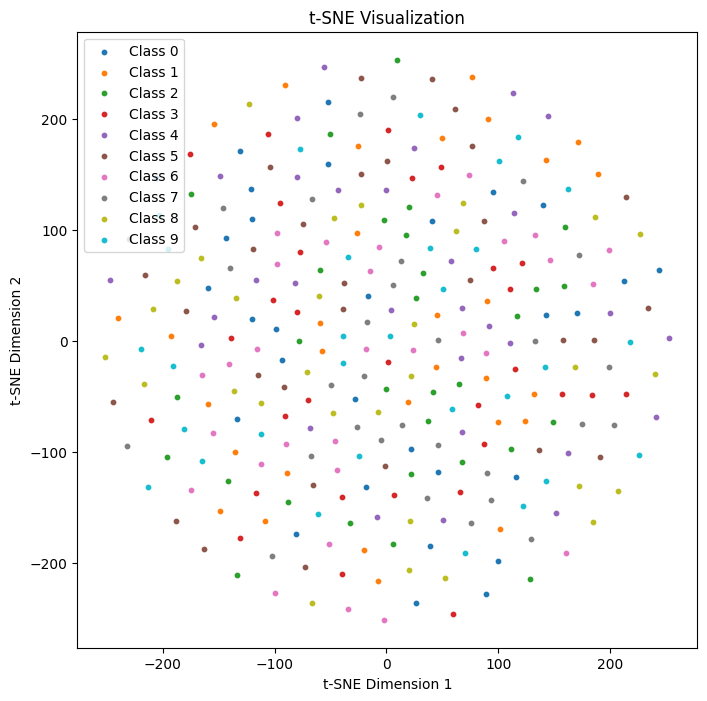

Epoch:2/25
Train error: 0.08362948304130917
Test error: 0.047564916610717774
Accuracy: 10.0%
Epoch:3/25
Train error: 0.04844778537750244
Test error: 0.04641917069753011
Accuracy: 10.0%
Epoch:4/25
Train error: 0.158914007459368
Test error: 0.047048742771148684
Accuracy: 10.0%
Early stopping as validation loss is increasing


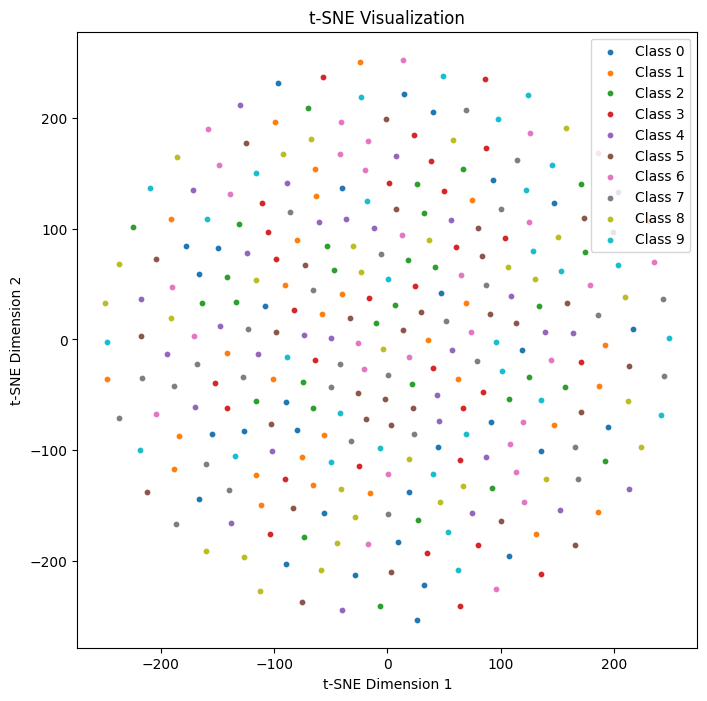

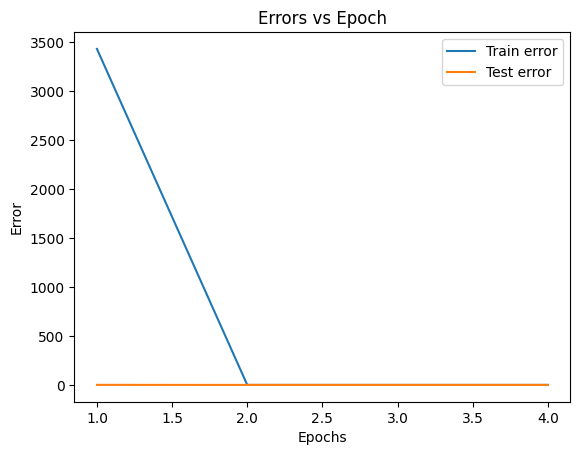

In [55]:
network = model1
epochs = 25
batch_size = 50

train(network, epochs, train_data, test_data, val_data, batch_size)

In [11]:
train_data = []
test_data = []
val_data = []


class_count_train = [0] * 10
for images, labels in train_loader:
    for i in range(len(labels)):
        label = int(labels[i])
        if class_count_train[label] < 21:
          train_data.append((images[i].numpy().reshape((1, 3, 224, 224)), label))
          class_count_train[label] += 1

train_data = np.array(train_data, dtype=object)


class_count_test = [0] * 10
for images, labels in test_loader:
    for i in range(len(labels)):
        label = int(labels[i])
        if class_count_test[label] < 6:
          test_data.append((images[i].numpy().reshape((1, 3, 224, 224)), label))
          class_count_test[label] += 1

test_data = np.array(test_data, dtype=object)

class_count_val = [0] * 10
for images, labels in val_loader:
    for i in range(len(labels)):
        label = int(labels[i])
        if class_count_val[label] < 3:
          val_data.append((images[i].numpy().reshape((1, 3, 224, 224)), label))
          class_count_val[label] += 1

val_data = np.array(val_data, dtype=object)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)


Train data shape: (210, 2)
Test data shape: (60, 2)
Validation data shape: (30, 2)


Epoch:1/25
Train error: 0.16974645796276275
Test error: 475253145.6
Accuracy: 10.0%


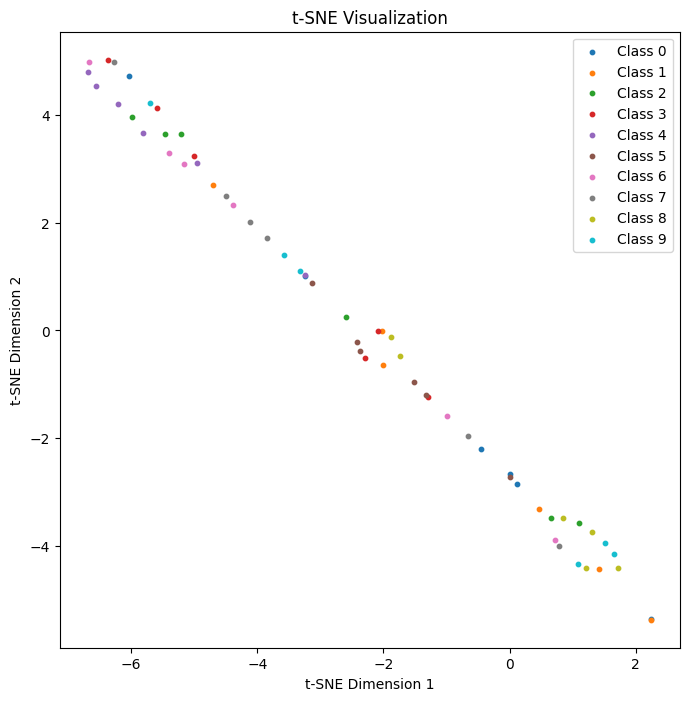

Epoch:2/25
Train error: 0.11176117147718156
Test error: 910032.7333333333
Accuracy: 11.666666666666666%
Epoch:3/25
Train error: 0.0649409294128418
Test error: 8932.229427083334
Accuracy: 11.666666666666666%
Epoch:4/25
Train error: 0.08653520856584822
Test error: 2621.56328125
Accuracy: 10.0%
Epoch:5/25
Train error: 0.06371018432435535
Test error: 45.9293212890625
Accuracy: 11.666666666666666%
Epoch:6/25
Train error: 0.0620758056640625
Test error: 73.28685506184895
Accuracy: 11.666666666666666%
Early stopping as validation loss is increasing


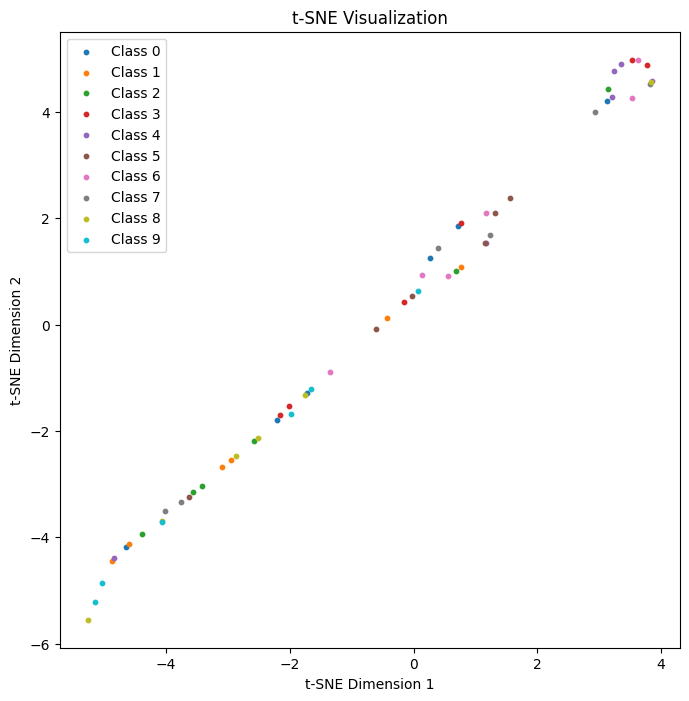

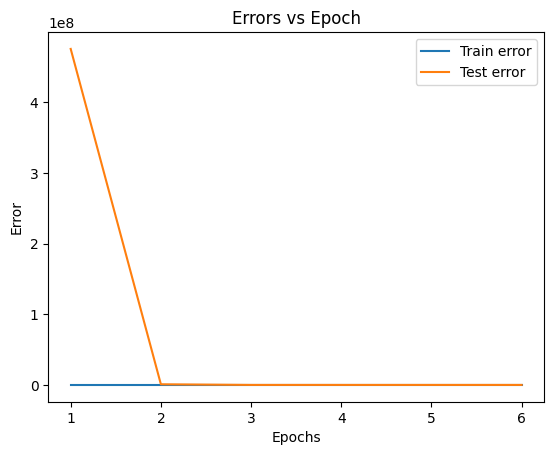

In [12]:
network = model2
epochs = 25
batch_size = 50

train(network, epochs, train_data, test_data, val_data, batch_size)

ResNet50 having a deeper network has less number of parameters compared to ResNet50. AlexNet is trained with 1050 images but ResNet50 is trained with 210 images.The time taken is almost the same but for different amount of train data.

AlexNet having shallower architecture results in lower accuracy. ResNet50, despite the lower parameter count, with its deeper structure, achieves higher accuracy, but at the expense of a longer training time.

Given the trade-off between performance and parameters, AlexNet seems a better network for this task as there isn't significant change in accuracy.

In [15]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [16]:
languages = ["Arabic", "Chinese", "Czech", "Dutch", "English", "French", "German", "Greek", "Irish", "Italian", "Japanese",
             "Korean", "Polish", "Portuguese", "Russian", "Scottish", "Spanish", "Vietnamese"]

n_categories = len(languages)

data = {}
for l in languages:
  lines = []
  path = "data/names/"+l+".txt"
  with open(path, 'r') as file:
    for line in file:
        lines.append(unicodeToAscii(line))
    data[l] = lines

In [17]:
def letterToIndex(letter):
    return all_letters.find(letter)

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [18]:
def randomTrainingExample():
  category = languages[np.random.randint(0, n_categories-1)]
  category_tensor = torch.tensor([languages.index(category)])
  input = data[category][np.random.randint(0, len(data[category])-1)]
  input_tensor = lineToTensor(input)
  return category, category_tensor, input, input_tensor

In [19]:
def randomTestingExample():
  np.random.seed(1)
  n_test = 500
  test_set = []
  for i in range(n_test):
    category = languages[np.random.randint(0, n_categories-1)]
    input = data[category][np.random.randint(0, len(data[category])-1)]
    input_tensor = lineToTensor(input)
    test_set.append([category, input_tensor])
  return test_set

In [20]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


In [21]:
n_hidden = 128
model = RNN(n_letters, n_hidden, n_categories)

In [22]:
criterion = nn.NLLLoss()

n_iters = 100000
plot_every = 1000
learning_rate = 0.005

current_loss = 0
all_losses = []

for j in range(1, n_iters + 1):
  category, category_tensor, input, input_tensor = randomTrainingExample()

  hidden = model.initHidden()
  model.zero_grad()

  for i in range(input_tensor.size()[0]):
    output, hidden = model(input_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  current_loss += loss.item()
  loss.backward()

  for p in model.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  if j % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0

test_set = randomTestingExample()

n_test = len(test_set)
correct = 0
hidden = model.initHidden()
for example in test_set:
  hidden = model.initHidden()
  for i in range(example[1].size()[0]):
    output, hidden = model(example[1][i], hidden)
  if languages.index(example[0]) == torch.argmax(output).item():
    correct += 1

print(f'Accuracy:{correct*100/n_test}%')


Accuracy:59.8%


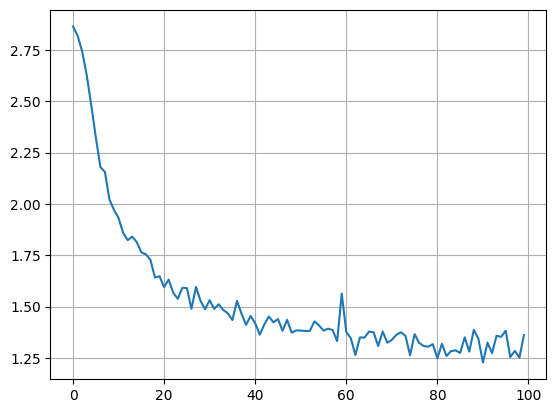

In [23]:
plt.plot(all_losses)
plt.grid(True)
plt.show()

In [24]:
class GRU(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input, hidden):
        output, hidden = self.i2h(input, hidden)
        output = self.h2o(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [25]:
model1 = GRU(n_letters, n_hidden, n_categories)

In [26]:
criterion = nn.CrossEntropyLoss()

n_iters = 100000
plot_every = 1000

optimiser = torch.optim.Adam(params = model1.parameters() ,lr = 0.005)

current_loss = 0
all_losses1 = []

for j in range(1, n_iters + 1):
  category, category_tensor, input, input_tensor = randomTrainingExample()

  hidden = model.initHidden()
  model1.zero_grad()

  for i in range(input_tensor.size()[0]):
    output, hidden = model1(input_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  current_loss += loss.item()
  loss.backward()
  optimiser.step()

  for p in model1.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  if j % plot_every == 0:
    all_losses1.append(current_loss / plot_every)
    current_loss = 0


In [27]:
test_set = randomTestingExample()

n_test = len(test_set)
correct = 0
hidden = model1.initHidden()
for example in test_set:
  hidden = model1.initHidden()
  for i in range(example[1].size()[0]):
    output, hidden = model1(example[1][i], hidden)
  if languages.index(example[0]) == torch.argmax(output).item():
    correct += 1

print(f'Accuracy:{correct*100/n_test}%')

Accuracy:47.8%


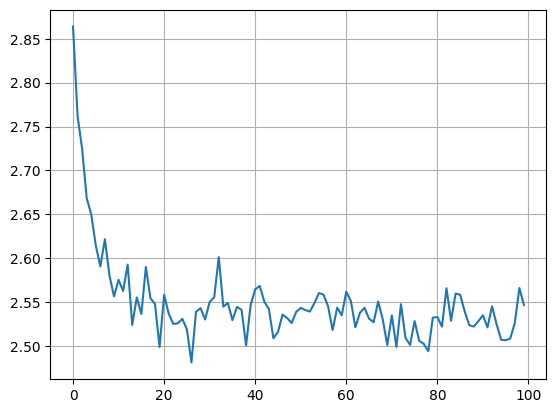

In [28]:
plt.plot(all_losses1)
plt.grid(True)
plt.show()

In [29]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.cell_size = hidden_size

        self.i2h = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self , input , hidden , cell):
        output, (hidden , cell) = self.i2h(input, (hidden , cell))
        output = self.h2o(output)
        output = self.softmax(output)
        return output, (hidden, cell)

    def initHidden(self):
        return torch.zeros(1,self.hidden_size)

    def initCell(self):
        return torch.zeros(1,self.hidden_size)


In [30]:
model2 = LSTM(n_letters, n_hidden, n_categories)

In [31]:
criterion = nn.CrossEntropyLoss()

n_iters = 100000
plot_every = 1000

optimiser = torch.optim.Adam(params = model2.parameters() ,lr = 0.005)

current_loss = 0
all_losses2 = []

for j in range(1, n_iters + 1):
  category, category_tensor, input, input_tensor = randomTrainingExample()

  hidden = model2.initHidden()
  cell = model2.initCell()
  model2.zero_grad()

  for i in range(input_tensor.size()[0]):
    output, (hidden, cell) = model2(input_tensor[i], hidden, cell)

  loss = criterion(output, category_tensor)
  current_loss += loss.item()
  loss.backward()
  optimiser.step()

  for p in model2.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  if j % plot_every == 0:
    all_losses2.append(current_loss / plot_every)
    current_loss = 0

In [35]:
test_set = randomTestingExample()
n_test = len(test_set)
correct = 0
hidden = model2.initHidden()
cell = model2.initCell()
for example in test_set:
  hidden = model2.initHidden()
  for i in range(example[1].size()[0]):
    output, (hidden, cell) = model2(example[1][i], hidden, cell)
  if languages.index(example[0]) == torch.argmax(output).item():
    correct += 1

print(f'Accuracy:{correct*100/n_test}%')

Accuracy:64.6%


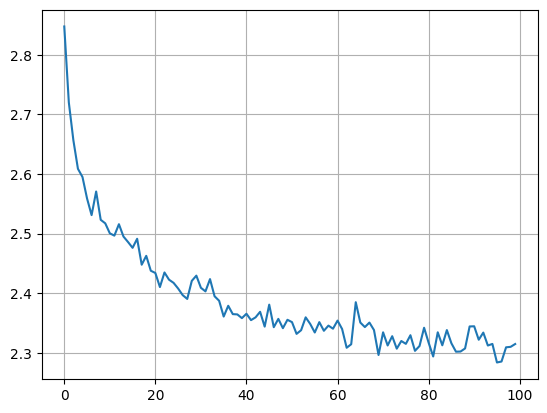

In [33]:
plt.plot(all_losses2)
plt.grid(True)
plt.show()